Import Modules

In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Read CSV files (Data Set 1)

In [2]:
df = pd.read_csv('Data Set 1.csv')
print(df)

         date  new_tested  acc_tested  new_confirmed  acc_confirmed  \
0   02-Mar-20         339         339              2              2   
1   03-Mar-20           2         341              0              2   
2   04-Mar-20          31         372              0              2   
3   05-Mar-20          16         388              0              2   
4   06-Mar-20          62         450              2              4   
5   07-Mar-20           4         454              0              4   
6   08-Mar-20          29         483              2              6   
7   09-Mar-20          60         543             13             19   
8   10-Mar-20         151         694              8             27   
9   11-Mar-20          99         793              7             34   
10  12-Mar-20          69         862              0             34   
11  13-Mar-20         143        1005             35             69   
12  14-Mar-20         200        1205             27             96   
13  15

Soal 1:
Dengan menggunakan line plot, tampilkan perbandingan jumlah akumulatif tes sampel, terkonfirmasi positif dan terkonfirmasi negatif untuk periode waktu yang tersedia.

In [3]:
dataset1 = df.iloc[:,[0,2,4,5]]

In [4]:
dataset1.set_index('date', inplace=True)
print(dataset1)

           acc_tested  acc_confirmed  acc_negative
date                                              
02-Mar-20         339              2           335
03-Mar-20         341              2           337
04-Mar-20         372              2           356
05-Mar-20         388              2           371
06-Mar-20         450              4           422
07-Mar-20         454              4           422
08-Mar-20         483              6           445
09-Mar-20         543             19           487
10-Mar-20         694             27           648
11-Mar-20         793             34           744
12-Mar-20         862             34           811
13-Mar-20        1005             69           917
14-Mar-20        1205             96          1109
15-Mar-20        1293            117          1167
16-Mar-20        1330            134          1183
17-Mar-20        1372            172          1278
18-Mar-20        1592            227          1342
19-Mar-20        1651          

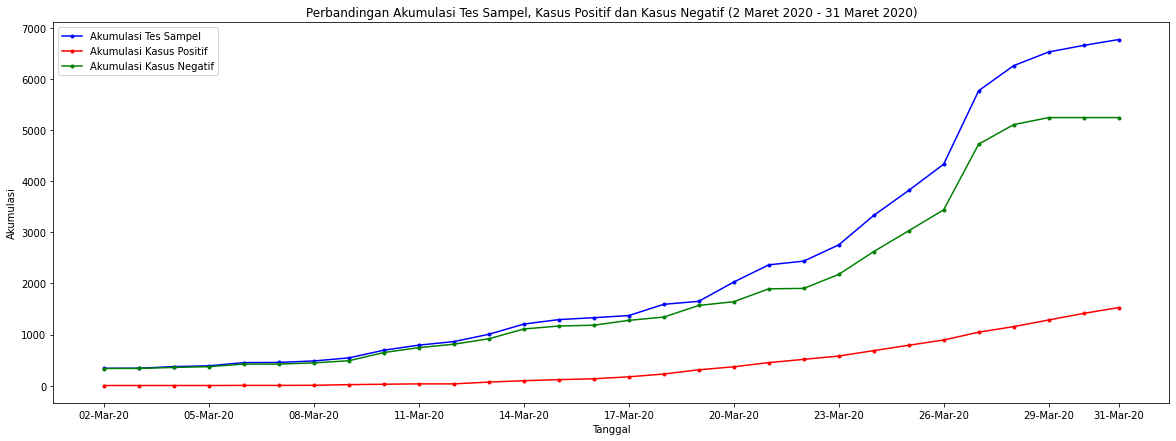

In [5]:
plt.figure(figsize=(20,7))

plt.title('Perbandingan Akumulasi Tes Sampel, Kasus Positif dan Kasus Negatif (2 Maret 2020 - 31 Maret 2020)')

plt.plot(df.date, df.acc_tested,'b.-', label='Akumulasi Tes Sampel')
plt.plot(df.date, df.acc_confirmed,'r.-', label='Akumulasi Kasus Positif')
plt.plot(df.date, df.acc_negative,'g.-', label='Akumulasi Kasus Negatif')

plt.xticks(df.date[::3].tolist()+['31-Mar-20'])

plt.xlabel('Tanggal')
plt.ylabel('Akumulasi')

plt.legend()

plt.show()

Soal 2:
• Hitunglah nilai positive rate dan negative rate untuk masing-masing waktu.
• Dengan menggunakan bar plot, tampilkan perbandingan positivity rate dan 
  negativity rate untuk periode waktu yang tersedia.
• Pada tanggal berapa nilai positive rate menunjukkan nilai tertinggi?
• Pada tanggal berapa nilai negative rate menunjukkan nilai tertinggi?

In [6]:
#POSITIVE RATE
jml_konf_positif = dataset1['acc_confirmed']
jml_tes_sampel = dataset1['acc_tested']
positive_rate = (jml_konf_positif/jml_tes_sampel).round(4)*100

positive_rate

date
02-Mar-20     0.59
03-Mar-20     0.59
04-Mar-20     0.54
05-Mar-20     0.52
06-Mar-20     0.89
07-Mar-20     0.88
08-Mar-20     1.24
09-Mar-20     3.50
10-Mar-20     3.89
11-Mar-20     4.29
12-Mar-20     3.94
13-Mar-20     6.87
14-Mar-20     7.97
15-Mar-20     9.05
16-Mar-20    10.08
17-Mar-20    12.54
18-Mar-20    14.26
19-Mar-20    18.72
20-Mar-20    18.20
21-Mar-20    19.03
22-Mar-20    21.08
23-Mar-20    21.01
24-Mar-20    20.56
25-Mar-20    20.67
26-Mar-20    20.60
27-Mar-20    18.11
28-Mar-20    18.43
29-Mar-20    19.67
30-Mar-20    21.22
31-Mar-20    22.55
dtype: float64

In [7]:
#NEGATIVE RATE
jml_konf_negatif = dataset1['acc_negative']
jml_tes_sampel = dataset1['acc_tested']
negative_rate = (jml_konf_negatif/jml_tes_sampel).round(4)*100

negative_rate

date
02-Mar-20    98.82
03-Mar-20    98.83
04-Mar-20    95.70
05-Mar-20    95.62
06-Mar-20    93.78
07-Mar-20    92.95
08-Mar-20    92.13
09-Mar-20    89.69
10-Mar-20    93.37
11-Mar-20    93.82
12-Mar-20    94.08
13-Mar-20    91.24
14-Mar-20    92.03
15-Mar-20    90.26
16-Mar-20    88.95
17-Mar-20    93.15
18-Mar-20    84.30
19-Mar-20    95.09
20-Mar-20    81.02
21-Mar-20    80.13
22-Mar-20    78.10
23-Mar-20    78.99
24-Mar-20    78.78
25-Mar-20    79.33
26-Mar-20    79.40
27-Mar-20    81.89
28-Mar-20    81.57
29-Mar-20    80.33
30-Mar-20    78.78
31-Mar-20    77.45
dtype: float64

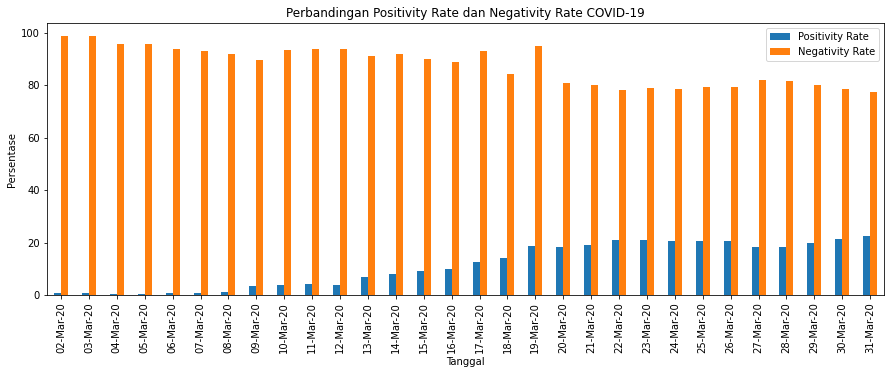

In [8]:
#PERBANDINGAN
compare = pd.DataFrame({'Positivity Rate': positive_rate, 'Negativity Rate': negative_rate})
compare.plot.bar(stacked = False, figsize = (15, 5))

plt.title('Perbandingan Positivity Rate dan Negativity Rate COVID-19')
plt.xlabel('Tanggal')
plt.ylabel('Persentase')

plt.show()

In [9]:
#Tanggal dengan positivity rate tertinggi
print(' Positivity Rate Tertinggi \n','Tanggal:',positive_rate.idxmax(),'\n','Positivity Rate:', positive_rate.max(),'\n')

#Tanggal dengan negativity rate tertinggi
print(' Negativity Rate Tertinggi \n','Tanggal:',negative_rate.idxmax(),'\n','Positivity Rate:', negative_rate.max())

 Positivity Rate Tertinggi 
 Tanggal: 31-Mar-20 
 Positivity Rate: 22.55 

 Negativity Rate Tertinggi 
 Tanggal: 03-Mar-20 
 Positivity Rate: 98.83


Soal 3:
• Dengan menggunakan heatmap, tunjukkan korelasi antar variabel yang ada pada 
dataset.
• Tentukan variabel-variabel yang memiliki nilai korelasi paling positif, dan berikan 
penjelasan terkait nilai korelasi tersebut.
• Tentukan variabel-variabel yang memiliki nilai korelasi paling negatif, dan berikan 
penjelasan terkait nilai korelasi tersebut.


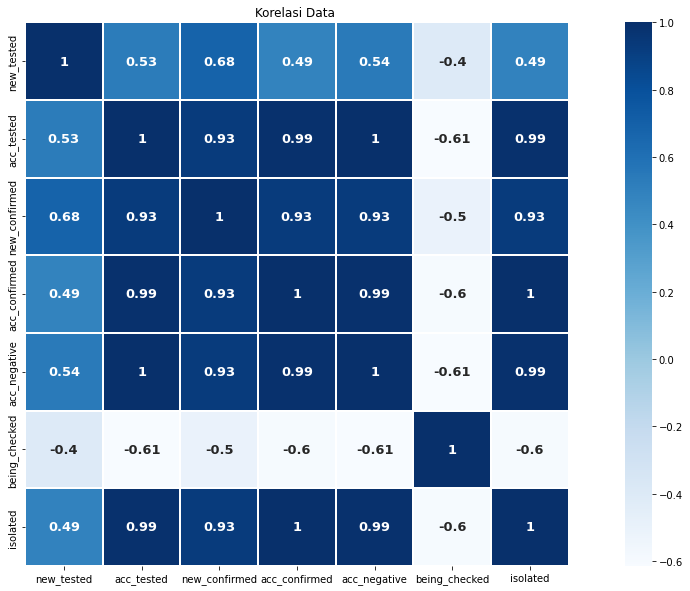

In [10]:
#HEATMAP KORELASI DATA
data_corelation = df.corr()
fig, ax = plt.subplots(figsize=(20,10))
sb.heatmap(data_corelation,cmap='Blues',annot=True, linewidths = 0.1, square=True, annot_kws={
    'fontsize': 13, 'fontweight': 'bold'
})

plt.title("Korelasi Data ")
plt.show()

In [11]:
df.corr()

,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
new_tested,1.000000,0.529012,0.681682,0.488240,0.541540,-0.402717,0.494872
acc_tested,0.529012,1.000000,0.927075,0.992487,0.999088,-0.611367,0.992602
new_confirmed,0.681682,0.927075,1.000000,0.925703,0.929067,-0.504804,0.928491
acc_confirmed,0.488240,0.992487,0.925703,1.000000,0.987653,-0.599737,0.999920
acc_negative,0.541540,0.999088,0.929067,0.987653,1.000000,-0.613971,0.987858
being_checked,-0.402717,-0.611367,-0.504804,-0.599737,-0.613971,1.000000,-0.600341
isolated,0.494872,0.992602,0.928491,0.999920,0.987858,-0.600341,1.000000


#VARIABEL DENGAN KORELASI TERPOSITIF
Variabel dengan korelasi terpositif adalah 'acc_confirmed' dengan 'isolated'. Dapat dilihat pada tabel korelasi bahwa nilai korelasi
'acc_confirmed' dengan 'isolated' adalah 0.999920. Hal ini berarti kedua variabel tersebut memiliki hubungan yang erat, semakin besar nilai
salah satu variabel maka nilai variabel yang lain akan semakin besar juga, sehingga menghasilkan nilai korelasi yang tinggi.


#VARIABEL DENGAN KORELASI TERNEGATIF
Variabel dengan korelasi ternegatif adalah 'acc_negative' dengan 'being_cheked'. Dapat dilihat pada tabel korelasi bahwa nilai korelasi
'acc_negative' dengan 'being_checked' adalah -0.613971. Hal ini berarti kedua variabel tersebut tidak memiliki hubungan yang erat, semakin
besar nilai salah satu variable akan menyebabkan semakin kecilnya variabel yang lain, sehingga menghasilkan nilai korelasi yang rendah.

Read CSV File (Data Set 2)

In [13]:
df2 = pd.read_csv('Data Set 2.csv')
print(df2)

    province_id              province_name                   island iso_code  \
0             1                       Aceh                  Sumatra       AC   
1             2                       Bali  Kepulauan Nusa Tenggara       BA   
2             3                     Banten                     Jawa       BT   
3             4                   Bengkulu                  Sumatra       BE   
4             5              DI Yogyakarta                     Jawa       YO   
5             6                DKI Jakarta                     Jawa       JK   
6             7                  Gorontalo                 Sulawesi       GO   
7             8                      Jambi                  Sumatra       JA   
8             9                 Jawa Barat                     Jawa       JB   
9            10                Jawa Tengah                     Jawa       JT   
10           11                 Jawa Timur                     Jawa       JI   
11           12           Kalimantan Bar

Soal 4
• Hitunglah nilai persentase perbandingan jumlah terkonfirmasi positif terhadap 
populasi per km2 untuk masing-masing provinsi.
• Dengan menggunakan bar plot, tampilkan perbandingan nilai persentase tersebut 
untuk masing-masing provinsi.
• Tampilkan 3 provinsi dengan nilai persentasi terbesar beserta nilai persentasenya.

In [14]:
#Data 
dataset2 = df2.loc[:,['province_name', 'confirmed', 'population_kmsquare' ]]
dataset2

,province_name,confirmed,population_kmsquare
0,Aceh,4,86
1,Bali,9,738
2,Banten,84,1298
3,Bengkulu,0,93
4,DI Yogyakarta,22,1134
5,DKI Jakarta,598,1353
6,Gorontalo,0,93
7,Jambi,1,63
8,Jawa Barat,98,1306
9,Jawa Tengah,43,986


In [15]:
dataset2.set_index('province_name', inplace=True)
print(dataset2)

                           confirmed  population_kmsquare
province_name                                            
Aceh                               4                   86
Bali                               9                  738
Banten                            84                 1298
Bengkulu                           0                   93
DI Yogyakarta                     22                 1134
DKI Jakarta                      598                 1353
Gorontalo                          0                   93
Jambi                              1                   63
Jawa Barat                        98                 1306
Jawa Tengah                       43                  986
Jawa Timur                        66                  806
Kalimantan Barat                   4                   41
Kalimantan Selatan                 1                  107
Kalimantan Tengah                  6                   16
Kalimantan Timur                  11                   17
Kalimantan Uta

In [16]:
#PERSENTASE
konf_covid = dataset2['confirmed']
pop_kmsquare = dataset2['population_kmsquare']

percentage = (konf_covid/pop_kmsquare).round(4)*100
percentage

province_name
Aceh                          4.65
Bali                          1.22
Banten                        6.47
Bengkulu                      0.00
DI Yogyakarta                 1.94
DKI Jakarta                  44.20
Gorontalo                     0.00
Jambi                         1.59
Jawa Barat                    7.50
Jawa Tengah                   4.36
Jawa Timur                    8.19
Kalimantan Barat              9.76
Kalimantan Selatan            0.93
Kalimantan Tengah            37.50
Kalimantan Timur             64.71
Kalimantan Utara              0.00
Kepulauan Bangka Belitung     0.00
Kepulauan Riau                2.11
Lampung                       1.76
Maluku                        2.94
Maluku Utara                  3.70
Nusa Tenggara Barat           0.84
Nusa Tenggara Timur           0.00
Papua                        70.00
Papua Barat                   0.00
Riau                          1.52
Sulawesi Barat                0.00
Sulawesi Selatan             15.85
Sulawe

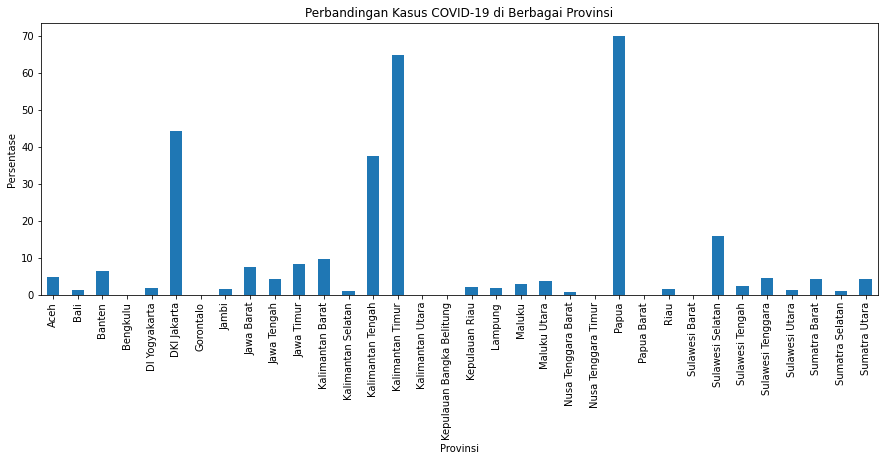

In [17]:
#PERBANDINGAN
percentage.plot.bar(stacked=False, figsize=(15,5))

plt.title('Perbandingan Kasus COVID-19 di Berbagai Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Persentase')
plt.show()


In [18]:
# 3 provinsi dengan nilai persentasi terbesar beserta nilai persentasenya
percentage.sort_values(ascending=False,axis=0,inplace=True)
percentage.head(3)

province_name
Papua               70.00
Kalimantan Timur    64.71
DKI Jakarta         44.20
dtype: float64

Soal 5
Dengan menggunakan pie chart, tampilkan persentase jumlah terkonfimasi positif untuk 
masing-masing pulau.

In [19]:
datasetno5 = df2.loc[:,['island','confirmed']]
datasetno5.set_index('island', inplace=True)
datasetno5.head()

,confirmed
island,
Sumatra,4
Kepulauan Nusa Tenggara,9
Jawa,84
Sumatra,0
Jawa,22


In [20]:
#pie chart persentase positif tiap pulau
pie = datasetno5.groupby('island', axis = 0).sum()
print(pie)

                         confirmed
island                            
Jawa                           911
Kalimantan                      22
Kepulauan Maluku                 2
Kepulauan Nusa Tenggara         11
Papua                            7
Sulawesi                        35
Sumatra                         29


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


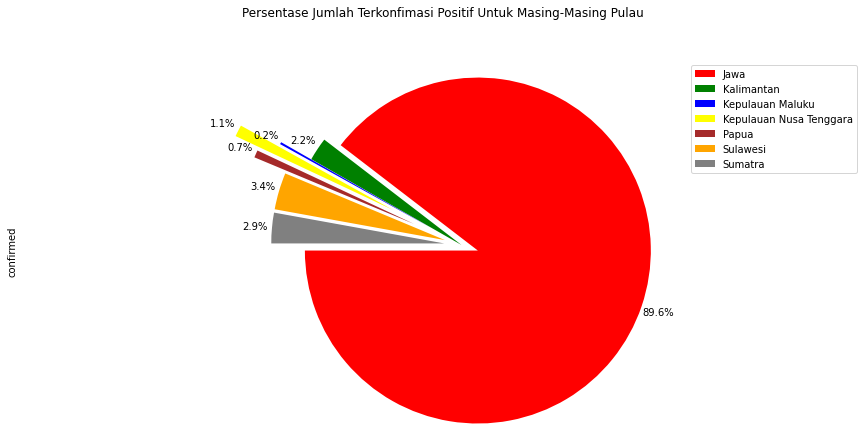

In [21]:
colour_list = ['red', 'green', 'blue', 'yellow', 'brown', 'orange', 'grey']
explode_list = [0.1, 0, 0.2, 0.45, 0.3, 0.1, 0.1]
pie.plot(kind='pie',
                  figsize = (15, 7),
                  autopct = '%1.1f%%', 
                  startangle = 180,     
                  labels = None,
                  pctdistance = 1.1,
                  subplots = True,
                  colors = colour_list,
                  explode = explode_list,           
                  )

plt.title('Persentase Jumlah Terkonfimasi Positif Untuk Masing-Masing Pulau', y= 1.1)
plt.axis('equal') 
plt.legend(labels=pie.index, loc='upper right') 
plt.show()